# 06 PCA t-SNE

1. Dla danych z zadania z 05 wykonaj*:
PCA dla n_components = [2 ,4, 6] i wyświetl wartość explained_variance_ratio_
utwórz wykres typu "słupkowego" dla wszystkich n_components_ i explained_variance_ratio_
oblicz n_components_, które zachowają wariancję na poziomie 95%
2. Dla datasetu z projektu:
utwórz scatter plot, korzystając z:
t-SNE**
PCA + t-SNE (skorzystaj z Pipeline lub make_pipeline)
porównaj czas oraz "jakość" powyższych wykresów
3. Zaimplementuj GridsearchCV oraz kPCA dla danych z pkt. 2:
znajdź najlepszy kernel oraz parametr gamma (zacznij od np.linespace(0.03, 0.05, 5))
wybierz dowolny klasyfikator

* Aby pobrać większy dataset skorzystaj z:
from sklearn.datasets import fetch_openml 

<br/> mnist = fetch_openml('mnist_784', version=1, as_frame=False)  
<br/> mnist.target = mnist.target.astype(np.uint8)  
<br/> X = mnist["data"] 
<br/> y = mnist["target"]

** Jeżeli czas utworzenia wykresu z wykorzystaniem t-SNE jest za długi,  zmniejsz dataset (wybierz losowe obserwacje)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

import numpy as np
import pandas as pd
import os
import time

In [4]:
X, y = load_wine()['data'], load_wine()['target']

In [5]:
# standar scaling
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

## 1

In [12]:
n_com = [2, 4, 6]
expl_ratio_sum = []

In [13]:
for n in n_com:
    pca = PCA(n_components=n)
    pca.fit(X_std)
    
    expl_ratio = pca.explained_variance_ratio_
    print(expl_ratio)
    
    expl_ratio = sum(expl_ratio)
    expl_ratio_sum.append(expl_ratio)

[0.36198848 0.1920749 ]
[0.36198848 0.1920749  0.11123631 0.0706903 ]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]


<AxesSubplot:xlabel='No of components'>

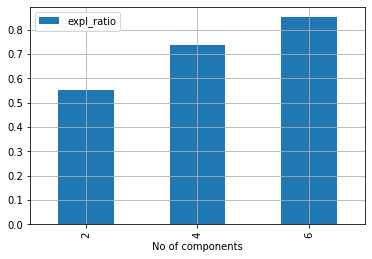

In [15]:
plot = pd.DataFrame(expl_ratio_sum, index=n_com, columns=["expl_ratio"])
plot.index.name = "No of components"
plot.plot(kind="bar", grid=True)

In [16]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(X)

pca.n_components_

1

## 2

In [19]:
os.chdir(r"C:\Users\angel\PycharmProjects\Machine_Learning_Project\Data")

In [20]:
train_data = pd.read_csv("train_data.csv", header=None)
test_data = pd.read_csv("test_data.csv", header=None)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 286.1 MB


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 95.4 MB


In [26]:
train_data_02, train_data_08 = train_test_split(train_data, test_size=0.8, shuffle=True, random_state = 42)
test_data_02, test_data_08 = train_test_split(test_data, test_size=0.8, shuffle=True, random_state = 42)

In [27]:
# standar scaling
scaler = StandardScaler().fit(test_data_02)
data_std = scaler.transform(test_data_02)

### PCA

In [28]:
pca = PCA(n_components=2, whiten=True, random_state=42)
pca_data = pca.fit_transform(data_std)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.0050882 0.0050136]
[112.78522928 111.95536735]


In [29]:
### tsne

In [30]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(data_std)

#print(tsne.embedding_)
print(tsne.kl_divergence_)

C:\Users\angel\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\angel\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


1.5805656909942627


In [31]:
data_sets = [pca_data, tsne_data]
data_names = ["pca_data", "tsne_data"]
colors = ["r", "g", "lb"]

time of 1 plot with pca_data: 0.01099705696105957 seconds
time of 1 plot with tsne_data: 0.01104879379272461 seconds


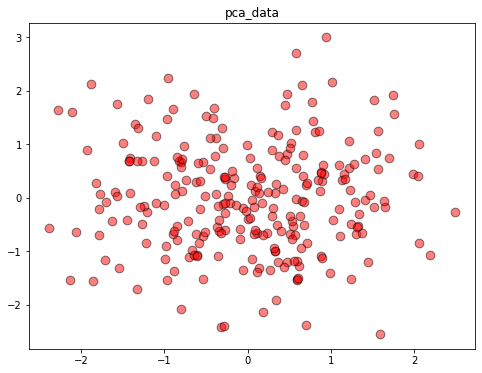

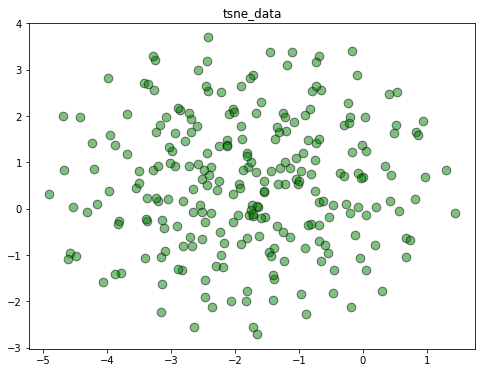

In [38]:
# plots 
for i, n, c in zip(data_sets, data_names, colors):
    plt.figure(figsize=(8, 6))
    start_time = time.time()
    plt.scatter(
        i[:, 0], i[:, 1],
        s=75, c=c,
        marker="o", 
        alpha=0.5,
        edgecolor="black"
    )
    end_time = time.time()
    plt.title(n)
    print(f"time of 1 plot with {n}: {end_time - start_time} seconds")

In [48]:
pipe = Pipeline([
    ("std", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])

C:\Users\angel\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\angel\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


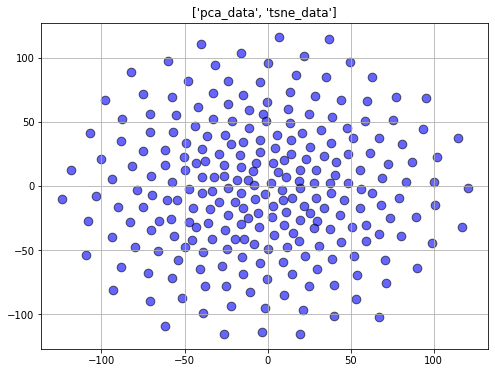

time of std+pca+tsne plot: 0.009001970291137695 seconds


In [44]:
piped = pipe.fit_transform(test_data_02)
plt.figure(figsize=(8, 6))
start_time = time.time()
plt.scatter(
    piped[:, 0],
    piped[:, 1],
    s=75, c="b",
    marker="o", 
    alpha=0.6,
    edgecolor="black"
    )
end_time = time.time()
plt.title(data_names)
plt.grid()
plt.show()
print(f"time of std+pca+tsne plot: {end_time - start_time} seconds")

## 3

In [45]:
train_labels = pd.read_csv("train_labels.csv", header=None)

In [49]:
y = train_labels[0].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.95, shuffle=True, random_state=42)

In [51]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)

### kPCA and GridSearch

In [53]:
kpca = KernelPCA()
svc_model = SVC()

pipe = Pipeline(steps=[('kpca', kpca), ('svc_model', svc_model)])
pipe.fit(X_train_std, y_train)

param_dict = {"kpca__gamma": np.linspace(0.03, 0.05, 5),
              "kpca__kernel": ['linear', 'poly', 'rbf'],
              "svc_model__C": [0.1, 1, 10, 100, 1000],
              "svc_model__gamma": [1, 0.1, 0.01, 0.001, 0.0001]}


grid = GridSearchCV(pipe, param_dict, verbose=0)
grid.fit(X_train_std, y_train)

GridSearchCV(estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('svc_model', SVC())]),
             param_grid={'kpca__gamma': array([0.03 , 0.035, 0.04 , 0.045, 0.05 ]),
                         'kpca__kernel': ['linear', 'poly', 'rbf'],
                         'svc_model__C': [0.1, 1, 10, 100, 1000],
                         'svc_model__gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [54]:
grid.best_params_

{'kpca__gamma': 0.03,
 'kpca__kernel': 'linear',
 'svc_model__C': 0.1,
 'svc_model__gamma': 1}

In [55]:
grid.best_score_

0.8662873399715505